In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plm
import matplotlib.pyplot as plt

# User Test

## Violin plot tempi esecuzione

In [2]:
ris_user_test = pd.read_csv('ris_user_test.csv')
ris_user_test.head()

,Domanda,Tempo_esecuzione(s),Esito,Note
0,1,34,1,NaN
1,2,26,1,NaN
2,1,42,1,sfdf
3,2,89,1,NaN
4,1,34,1,NaN


In [3]:
domanda_1 = ris_user_test[ris_user_test['Domanda'] == 1]
domanda_2 = ris_user_test[ris_user_test['Domanda'] == 2]

### Primo task

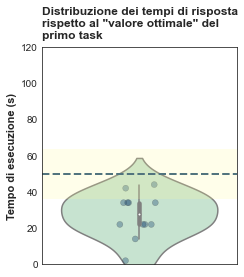

In [4]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(3.5)

sns.violinplot(data=domanda_1, y='Tempo_esecuzione(s)',\
                   #width = 1, \
                    linewidth=1.5, \
                    color = '#c3e7cf', \
                    #cut = 0, \
                    alpha = 0.4, \
                    ax = ax)


#Sovrapposizione strip plots, con colore dei punti dipendente dal valore di umidità media
stripplot = sns.stripplot(data=domanda_1, y='Tempo_esecuzione(s)',\
                      color = "#275379", \
                      alpha = 0.4, \
                      linewidth = 0.4, \
                      s = 6,
                      zorder = 1,
                      ax = ax)

#Personalizzazione degli assi (nomi e ticks)
ax.tick_params(length=0)
ax.set_ylim(0,120)
y_label = "Tempo di esecuzione (s)"
ax.set_ylabel(y_label, size=11, weight="bold")

#Inserimento del titolo
titolo = "Distribuzione dei tempi di risposta\nrispetto al \"valore ottimale\" del\nprimo task"
fig.suptitle(
    titolo,
    x = 0.125,
    y = 1.02,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)

# linea e banda riferimento (tempi giusti)
media = 50
ax.axhline(media, lw = 2, color='#275379', ls = '--')
ax.axhline(media, lw = 50, alpha = 0.2, color = '#fffb96')

fig.savefig("ut_violin_primo.png", dpi=300, bbox_inches='tight')

### Secondo task

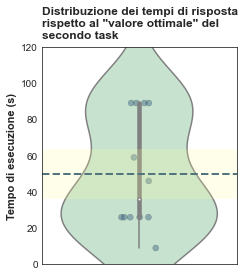

In [5]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(3.5)

sns.violinplot(data=domanda_2, y='Tempo_esecuzione(s)',\
                   #width = 1, \
                    linewidth=1.5, \
                    color = '#c3e7cf', \
                    #cut = 0, \
                    alpha = 0.4, \
                    ax = ax)


#Sovrapposizione strip plots, con colore dei punti dipendente dal valore di umidità media
stripplot = sns.stripplot(data=domanda_2, y='Tempo_esecuzione(s)',\
                      color = "#275379", \
                      alpha = 0.4, \
                      linewidth = 0.4, \
                      s = 6,
                      zorder = 1,
                      ax = ax)

#Personalizzazione degli assi (nomi e ticks)
ax.tick_params(length=0)
ax.set_ylim(0,120)
y_label = "Tempo di esecuzione (s)"
ax.set_ylabel(y_label, size=11, weight="bold")

#Inserimento del titolo
titolo = "Distribuzione dei tempi di risposta\nrispetto al \"valore ottimale\" del\nsecondo task"
fig.suptitle(
    titolo,
    x = 0.125,
    y = 1.02,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)

# linea e banda riferimento (tempi giusti)
media = 50
ax.axhline(media, lw = 2, color='#275379', ls = '--')
ax.axhline(media, lw = 50, alpha = 0.2, color = '#fffb96')

fig.savefig("ut_violin_secondo.png", dpi=300, bbox_inches='tight')

## Stacked bar chart esito

In [6]:
percent_domande = ris_user_test.groupby('Domanda')['Esito'].agg([lambda x: int(sum(x == 1)/len(x)*100), lambda x: int(sum(x==0)/len(x)*100), lambda x: 100]).reset_index()
percent_domande.columns = ['Domanda', 'Esito positivo', 'Esito negativo', 'Max']
percent_domande

,Domanda,Esito positivo,Esito negativo,Max
0,1,100,0,100
1,2,91,8,100


In [7]:
percent_dom_1 = [percent_domande['Esito positivo'][0], percent_domande['Esito negativo'][0]]
percent_dom_2 = [percent_domande['Esito positivo'][1], percent_domande['Esito negativo'][1]]

### Primo task

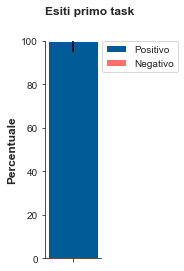

In [8]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(1)
plt.ylim(0, 100)


#Primo task
ax.bar('Primo task',\
       percent_dom_1[0],\
       #width,\
       yerr=5,\
       color = '#005b96',\
       label='Positivo',\
      )
ax.bar('Primo task',\
       percent_dom_1[1],\
       color = '#ff6f69',\
       bottom=percent_dom_1[0],\
       label='Negativo',\
      )

#legenda e label
ax.set_ylabel('Percentuale', size=12, weight="bold")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#sistemo assi
ax.set(xticklabels=[])
sns.despine()


#Inserimento del titolo
titolo = "Esiti primo task"
fig.suptitle(
    titolo,
    x = 0.125,
    y = 1,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)

fig.savefig("ut_bar_primo.png", dpi=300, bbox_inches='tight')

### Secondo task

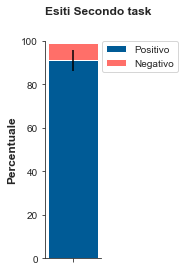

In [9]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(1)
plt.ylim(0, 100)


#Primo task
ax.bar('Primo task',\
       percent_dom_2[0],\
       #width,\
       yerr=5,\
       color = '#005b96',\
       label='Positivo',\
      )
ax.bar('Primo task',\
       percent_dom_2[1],\
       color = '#ff6f69',\
       bottom=percent_dom_2[0],\
       label='Negativo',\
      )

#legenda e label
ax.set_ylabel('Percentuale', size=12, weight="bold")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#sistemo assi
ax.set(xticklabels=[])
sns.despine()


#Inserimento del titolo
titolo = "Esiti Secondo task"
fig.suptitle(
    titolo,
    x = 0.125,
    y = 1,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)

fig.savefig("ut_bar_secondo.png", dpi=300, bbox_inches='tight')

## Questionario psicometrico

In [10]:
ris_questionario_dataviz = pd.read_csv('ris_questionario_dataviz.csv')

In [11]:
ris_questionario_dataviz.columns = ['Data', 'Utile', 'Chiara', 'Informativa', 'Bella', 'Valore complessivo', 'Note']
ris_questionario_dataviz.head()

,Data,Utile,Chiara,Informativa,Bella,Valore complessivo,Note
0,2022/01/29 5:56:16 PM CET,1,4,3,5,2,scsdc
1,2022/01/29 5:56:40 PM CET,2,6,4,5,5,cccc
2,2022/01/29 5:56:16 PM CET,3,4,3,5,2,scsdc
3,2022/01/29 5:56:40 PM CET,1,6,4,5,5,cccc
4,2022/01/29 5:56:16 PM CET,1,4,3,5,2,scsdc


In [12]:
ris_melt = ris_questionario_dataviz.melt(id_vars=['Data', 'Note'], var_name="Aggettivo", value_name="Voto").sort_values('Aggettivo')
ris_melt.head()

,Data,Note,Aggettivo,Voto
36,2022/01/29 5:56:16 PM CET,scsdc,Bella,5
37,2022/01/29 5:56:40 PM CET,cccc,Bella,5
38,2022/01/29 5:56:16 PM CET,scsdc,Bella,5
39,2022/01/29 5:56:40 PM CET,cccc,Bella,5
41,2022/01/29 5:56:40 PM CET,cccc,Bella,5


In [13]:
#parmametro ic
z = 1.96

percent_2_gruppi = ris_melt.groupby('Aggettivo')['Voto'].agg([lambda x: sum(x<=3)/len(x)*100, lambda x: sum(x>3)/len(x)*100, lambda x: z*(int(sum(x<=3)/len(x)*100) * int(sum(x>3)/len(x)*100) / len(x))**(1/2)]).reset_index()
percent_2_gruppi.columns = ['Aggettivo', 'Voti 1-3', 'Voti 4-6', 'IC']
percent_2_gruppi

,Aggettivo,Voti 1-3,Voti 4-6,IC
0,Bella,8.333333,91.666667,15.266207
1,Chiara,0.000000,100.000000,0.000000
2,Informativa,50.000000,50.000000,28.290163
3,Utile,91.666667,8.333333,15.266207
4,Valore complessivo,58.333333,41.666667,27.591250


### Stacked bar chart

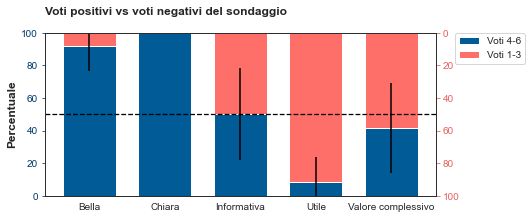

In [14]:
sns.set_style('white')

fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(7)
plt.ylim(0, 100)
ax2 = ax.twinx()
ax2.set_ylim(100, 0)

ax.tick_params(axis='y', colors='#03396c')
ax2.tick_params(axis='y', colors='#e5635e')


#Bar plot
ax.bar(percent_2_gruppi['Aggettivo'],\
       percent_2_gruppi['Voti 4-6'],\
       yerr=percent_2_gruppi['IC'],\
       width = 0.7,\
       color = '#005b96',\
       label='Voti 4-6',\
      )

ax.bar(percent_2_gruppi['Aggettivo'],\
       percent_2_gruppi['Voti 1-3'],\
       width = 0.7,\
       color = '#ff6f69',\
       bottom=percent_2_gruppi['Voti 4-6'],\
       label='Voti 1-3',\
      )

#legenda e label
ax.set_ylabel('Percentuale', size=12, weight="bold")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#sistemo assi
#sns.despine()


#Inserimento del titolo
titolo = "Voti positivi vs voti negativi del sondaggio"
fig.suptitle(
    titolo,
    x = 0.125,
    y = 1,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)
ax.axhline(50, lw = 1.3, color='k', ls = '--')

fig.savefig("qp_barchart.png", dpi=300, bbox_inches='tight')

### Grafico correlazioni

In [15]:
corr = ris_questionario_dataviz[['Utile', 'Chiara', 'Informativa', 'Bella', 'Valore complessivo']].corr()
corr.columns = ['Utile', 'Chiara', 'Informativa', 'Bella', 'Valore\ncomplessivo']
corr.index = ['Utile', 'Chiara', 'Informativa', 'Bella', 'Valore\ncomplessivo']

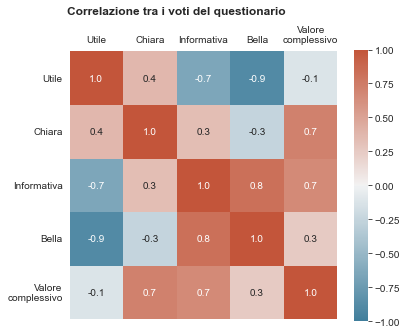

In [16]:
import numpy as np
import textwrap

fig, ax = plt.subplots()

fig.set_figheight(5)
sns.heatmap(corr,\
            square = True,\
            annot=True,\
            fmt='.1f',\
            #mask = np.triu(np.ones_like(corr, dtype=bool)),\
            cmap = sns.diverging_palette(230, 20, as_cmap=True),\
            ax = ax,\
            vmin = -1,\
            vmax = 1,\
           )

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

#Inserimento del titolo
titolo = "Correlazione tra i voti del questionario"
fig.suptitle(
    titolo,
    x = 0.12,
    y = 1,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True)

plt.yticks(rotation=0)

fig.savefig("qp_correlazioni.png", dpi=300, bbox_inches='tight')

### Violin plot o Farfalla

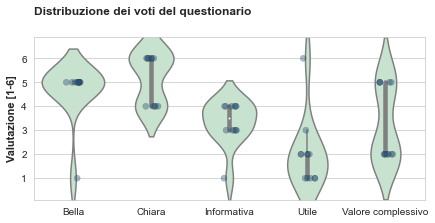

In [17]:
sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(7)

sns.violinplot(data=ris_melt,\
                    y='Voto',\
                    x='Aggettivo',\
                    #width = 1, \
                    #linewidth=1, \
                    color = '#c3e7cf', \
                    #cut = 0, \
                    alpha = 0.4,\
                    #order = ['Utile', 'Chiara', 'Informativa', 'Bella', 'Valore\ncomplessivo'],\
                    ax = ax,\
             )


#Sovrapposizione strip plots, con colore dei punti dipendente dal valore di umidità media
stripplot = sns.stripplot(data=ris_melt,\
                      y='Voto',\
                      x='Aggettivo',\
                      color = "#275379", \
                      alpha = 0.4, \
                      linewidth = 0.4, \
                      s = 6,
                      #order = ['Utile', 'Chiara', 'Informativa', 'Bella', 'Valore\ncomplessivo'],\
                      ax = ax)

#Personalizzazione degli assi (nomi e ticks)
#ax.tick_params(length=0)
ax.set_ylim(0.1,6.9)
y_label = "Valutazione [1-6]"
ax.set_ylabel(y_label, size=11, weight="bold")
ax.set(xlabel=None)
#
#Inserimento del titolo
titolo = "Distribuzione dei voti del questionario"
fig.suptitle(
    titolo,
    x = 0.125,
    y = 1.02,
    ha="left",
    fontsize=12,
    weight="bold",
    wrap = True
)

fig.savefig("qp_violin.png", dpi=300, bbox_inches='tight')